### Nonlinear Root Finding: Van der Waals Equation

This example demonstrates how to solve a nonlinear equation involving pressure-volume-temperature relationships using numerical root finding. The equation is derived from a modified Van der Waals form:

#### Equation

We solve:

$$
f(V) = \left(P + \dfrac{a}{V^2} \right)(V - b) - R T
$$

#### Parameters

- $P = 56$ (pressure)
- $R = 0.08206$ (gas constant)
- $T = 450$ (temperature)
- $T_c = 405.5$, $P_c = 111.3$ (critical values)
- $a = \dfrac{27 R^2 T_c^2}{64 P_c}$
- $b = \dfrac{R T_c}{8 P_c}$
- $Z = \dfrac{P V}{R T}$ (compressibility factor, computed after root is found)

#### Purpose

To find the molar volume $V$ that satisfies the equation using `scipy.optimize.root_scalar`, and to visualize $f(V)$ over the interval $V \in [0.4, 1.0]$ to identify the root location.

Ref: https://www.polymathplus.org/

In [1]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

In [2]:
# Given constants
P = 56
R = 0.08206
T = 450
Tc = 405.5
Pc = 111.3

# Derived parameters
a = 27 * (R**2 * Tc**2 / Pc) / 64
b = R * Tc / (8 * Pc)

# Define the nonlinear function f(V)
def f(V):
    return (P + a / V**2) * (V - b) - R * T

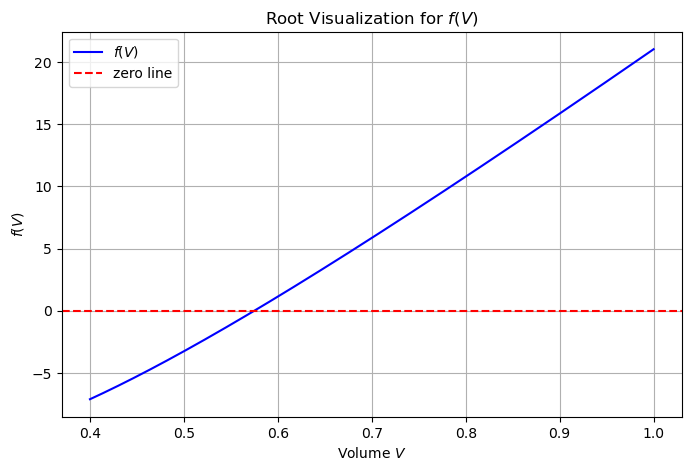

In [7]:
# Volume range for plotting
V_vals = np.linspace(0.4, 1.0, 300)
f_vals = f(V_vals)

# Plot f(V) and y=0 line
plt.figure(figsize=(8, 5))
plt.plot(V_vals, f_vals, label='$f(V)$', color='blue')
plt.axhline(0, color='red', linestyle='--', label='zero line')
plt.xlabel('Volume $V$')
plt.ylabel('$f(V)$')
plt.title('Root Visualization for $f(V)$')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Solve using Brent's method within the bracket
solution = root_scalar(f, bracket=[0.4, 1.0], method='brentq')

# Display result
if solution.converged:
    V_root = solution.root
    Z = P * V_root / (R * T)
    print(f"Root found: V = {V_root:.6f}")
    print(f"Compressibility factor Z = {Z:.6f}")
else:
    print("Root finding did not converge.")

Root found: V = 0.574892
Compressibility factor Z = 0.871827
